In [2]:
import pandas as pd
import glob
txtfiles = []
for file in glob.glob("/Users/jaeheukjung/Documents/Stocks/*.txt"):
    txtfiles.append(file)

In [3]:
import os
import glob
import pandas as pd
os.chdir("/Users/jaeheukjung/Documents/Stocks")

In [4]:
all_filenames = [i for i in glob.glob('*.{}'.format('txt'))]

In [5]:
list_of_df = []

In [6]:
test_df = pd.read_csv(all_filenames[0])
test_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,12.868,12.982,12.834,12.834,15928,0
1,2005-02-28,13.536,13.536,13.273,13.281,16382,0
2,2005-03-01,13.185,13.299,13.185,13.299,1250,0
3,2005-03-02,13.361,13.395,13.273,13.291,8760,0
4,2005-03-03,13.361,13.404,12.966,13.218,9897,0


In [7]:
def create_df (i):
    my_df = pd.read_csv(all_filenames[i])
    list_of_df.append(my_df)

In [8]:
nanlist = [137,1077, 1150,1905, 2089,2163, 2448, 2507, 2841, 2896, 2977,3196,3345, 3418, 3795, 3979, 4134, 4374, 4459, 4665, 4896, 5334,5839, 5964,6240,6296,6650,6755,6828,7078,7128]

In [9]:
for i in range(0, len(all_filenames)):
    if(i not in nanlist):
        print(i)
        create_df(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086


3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766


5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429


6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7079


In [9]:
len(nanlist)

31

In [10]:
sorteddflist= sorted(list_of_df,key=lambda x:x["Volume"].max(axis=0))

In [11]:
len(sorteddflist)

7163

In [12]:
general_companies = sorteddflist[2000:6162]

In [13]:
companies_of_interest = sorteddflist[6163:7163]

In [14]:
companies_of_interest.sort(key=len)

In [15]:
general_companies.sort(key=len)

In [16]:
general_companies = general_companies[1000:4161]

In [17]:
companies_of_interest = companies_of_interest[100:999]

In [83]:
history = []
volume_mean =[]

In [116]:
volume = []

In [272]:
change_list = []

In [293]:
def plot_change(x):
    df = general_companies[x]
    change=0
    for i,j in df.iterrows():
        if (j[1]!=0):
            change = (j[4]-j[1])/j[1]
            change_list.append(change)

In [294]:
for i in range(0, len(companies_of_interest)):
    plot_change(i)

In [ ]:
for i in range(0, len(companies_of_interest)):
    if(i%100==0):
        print(i)
    plot_change(i)

In [302]:
for i in range(0, len(change_list)):
    change_list[i]= change_list[i]/100

In [297]:
len(change_list)

1200975

In [335]:
count_p=0
count_n=0
for i in change_list:
    if(i>5):
        count_p = count_p+1
    if(i<-5):
        print(i)
        count_n = count_n+1
   
        
print(count_p)
print(count_n)

-15.883972690581272
-42.08860759493671
-10.581497797356837
-17.36465781409601
-5.405405405405411
-7.056856187290967
-21.476063829787226
-8.875739644970409
-12.94117647058823
-5.000000000000004
-13.063063063063057
-6.363636363636369
-7.945597709377246
-14.82857142857143
-10.161360662887052
-9.251101321585901
-9.375000000000009
-5.645161290322586
-9.384615384615392
-6.086956521739117
-5.707762557077626
-5.336426914153122
-5.3333333333333375
-22.077922077922082
-6.355140186915885
-7.6525731777310115
-5.345975388339719
-7.594936708860765
-7.272727272727265
-8.851529268786715
-15.883972690581272
-42.08860759493671
-10.581497797356837
-17.36465781409601
-5.405405405405411
-7.056856187290967
-21.476063829787226
-8.875739644970409
-12.94117647058823
-5.000000000000004
-13.063063063063057
-6.363636363636369
-7.945597709377246
-14.82857142857143
-10.161360662887052
-9.251101321585901
-9.375000000000009
-5.645161290322586
-9.384615384615392
-6.086956521739117
-5.707762557077626
-5.336426914153122

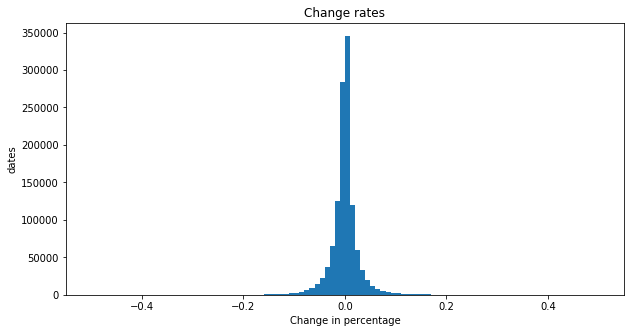

In [325]:
plt.figure(figsize=(10,5))
plt.hist(change_list, bins =100, range=(-.5, .5))
plt.xlabel('Change in percentage')
plt.ylabel('dates')
plt.title('Change rates')
plt.savefig('change graph')

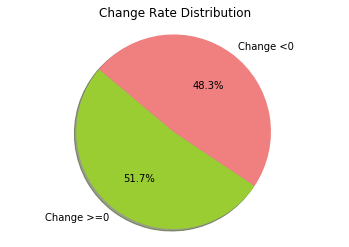

In [328]:
labels = 'Change >=0', 'Change <0'
sizes = [621212,579763]
colors = ['yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Change Rate Distribution')

plt.axis('equal')
plt.show()

In [95]:
for i in range(0, len(list_of_df)):
    plot_history(i)

In [97]:
len(volume_mean)

7163

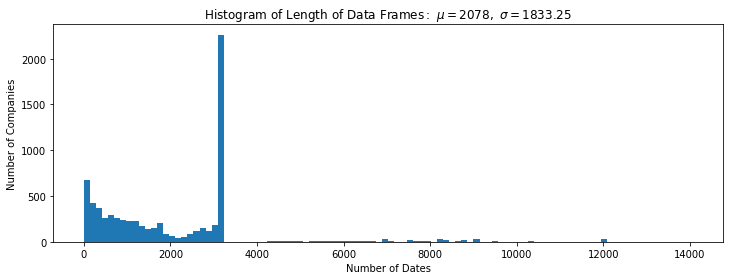

In [254]:
plt.figure(figsize=(12,4))
plt.hist(history, bins=100)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frames:}\ \mu=2078,\ \sigma=1833.25$')
plt.savefig('all time')

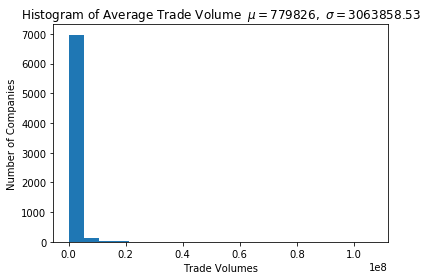

In [253]:
plt.figure(figsize=(6,4))
plt.hist(volume_mean, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\:}\ \mu=779826,\ \sigma=3063858.53$')
plt.savefig('all volume')

In [201]:
b_hist =[]
s_hist =[]
s_vol =[]

In [210]:
b_vol =[]

In [202]:
def plot_history(x):
    df = general_companies[x]
    sum=0
    for i,j in df.iterrows():
        sum = sum+j[5]
    
    s_hist.append(len(df))
    s_vol.append(sum/len(df))

In [213]:
def big(x):
    df = companies_of_interest[x]
    print(x)
    sum=0
    for i,j in df.iterrows():
        sum = sum+j[5]
    
    b_hist.append(len(df))
    b_vol.append(sum/len(df))

In [214]:
for i in range(0,len(companies_of_interest)):
    big(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

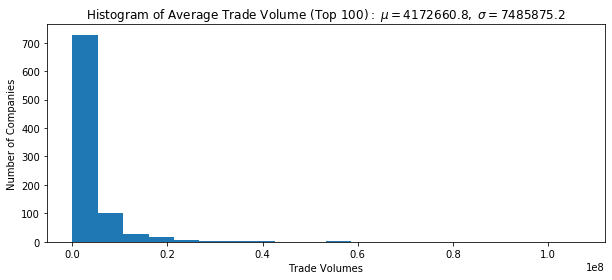

In [252]:
plt.figure(figsize=(10,4))
plt.hist(b_vol, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\ (Top\ 100):}\ \mu=4172660.8,\ \sigma=7485875.2$')
plt.savefig('top 100 volume_r')

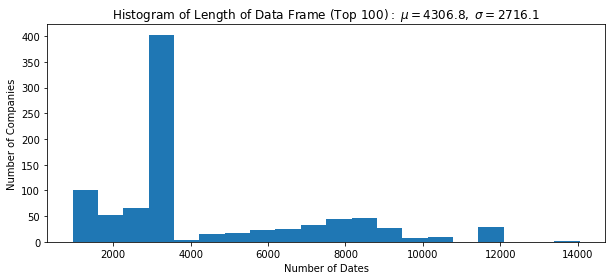

In [251]:
plt.figure(figsize=(10,4))
plt.hist(b_hist, bins=20)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frame\ (Top\ 100):}\ \mu=4306.8,\ \sigma=2716.1$')
plt.savefig('top 100 volume')

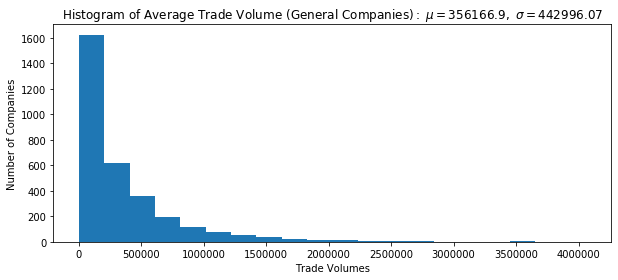

In [249]:
plt.figure(figsize=(10,4))
plt.hist(s_vol, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\ (General\ Companies):}\ \mu=356166.9,\ \sigma=442996.07$')
plt.savefig('general volume')

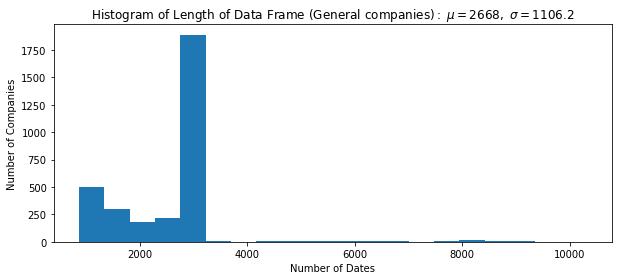

In [255]:
plt.figure(figsize=(10,4))
plt.hist(s_hist, bins=20)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frame\ (General\ companies):}\ \mu=2668,\ \sigma=1106.2$')
plt.savefig('general date')

In [222]:
import statistics as s
s.median(vo)

3175

In [248]:
s.mean(volume_mean)

779826.325805949

In [235]:
s.stdev(b_vol)

7485875.189914029

(array([6.497e+03, 3.590e+02, 1.170e+02, 6.500e+01, 3.600e+01, 1.600e+01,
        1.400e+01, 1.000e+01, 6.000e+00, 1.200e+01, 3.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.02976190e+01, 1.77740010e+06, 3.55475990e+06, 5.33211970e+06,
        7.10947950e+06, 8.88683930e+06, 1.06641991e+07, 1.24415589e+07,
        1.42189187e+07, 1.59962785e+07, 1.77736383e+07, 1.95509981e+07,
        2.13283579e+07, 2.31057177e+07, 2.

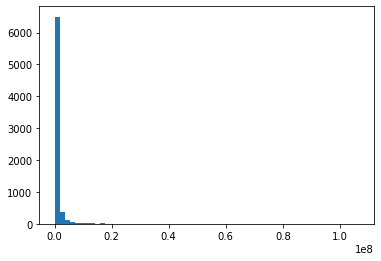

In [121]:
plt.hist(volume_mean, bins = 60)

In [18]:
classification = {}

In [148]:
zipped = tuple(zipped)

In [159]:
import numpy as np
zipped = np.array(zipped)

In [329]:
from scipy import stats 
stats.describe(change_list)

DescribeResult(nobs=1200975, minmax=(-42.08860759493671, 80.48780487804879), mean=0.0004080965118436734, variance=0.04430735114475457, skewness=77.8766796101842, kurtosis=36384.9145119549)

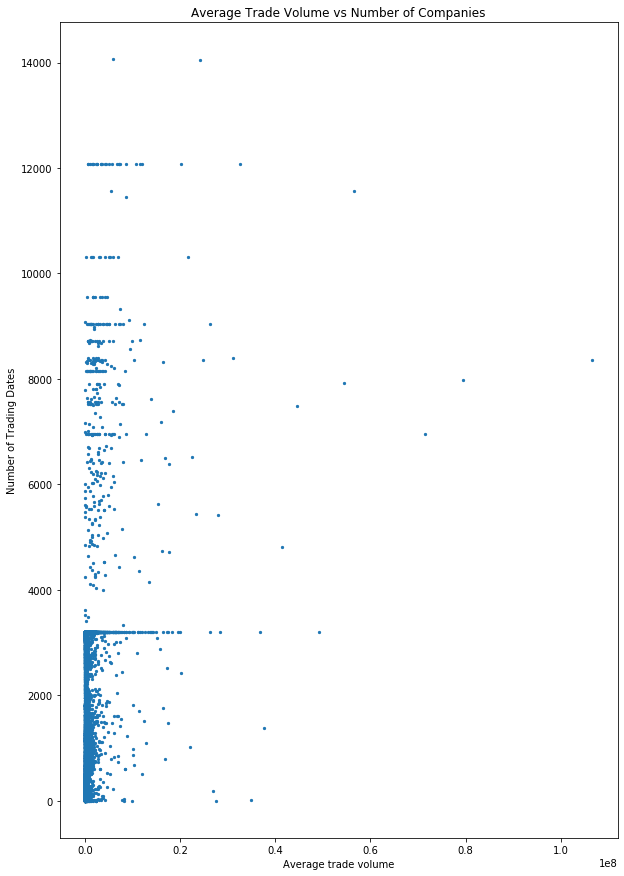

In [296]:
plt.figure(figsize=(10,15))
plt.scatter(volume_mean, history, s=5)
plt.xlabel('Average trade volume')
plt.ylabel('Number of Trading Dates')
plt.title('Average Trade Volume vs Number of Companies')
plt.savefig('overall scatter')

[[2.01156814e+03 4.52918221e+05]
 [5.71745455e+03 5.57100229e+07]
 [4.76652201e+03 1.13574126e+07]]


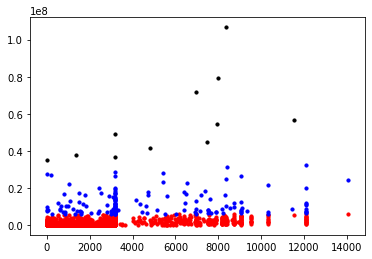

In [164]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(zipped)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(zipped)

plt.scatter(zipped[y_km ==0,0], zipped[y_km == 0,1], s=10, c='red')
plt.scatter(zipped[y_km ==1,0], zipped[y_km == 1,1], s=10, c='black')
plt.scatter(zipped[y_km ==2,0], zipped[y_km == 2,1], s=10, c='blue')


In [19]:
def relativity (x,y):
    df= companies_of_interest[x]
    df1= general_companies[y]
    changelist = []
    changelist_1 = []
    positive = 0
    negative = 0
    countpos = 0
    countneg = 0
    
    if(len(df1)>200):
        for i, j in df.iterrows():
            if(j[1]!=0):
                change = (j[4]-j[1])/j[1]
                changelist.append((j[0], change))
        for i, j in df1.iterrows():
            if(j[1]!=0):
                change1 = (j[4]-j[1])/j[1]
                changelist_1.append((j[0], change1))
    
        for c in changelist:
            date, change = c
            for c1 in changelist_1:
                date1, change1 = c1
                if(date == date1):
                    if((change >0) & (change1>0)):
                        classification.update({date:1})
                        positive= positive+compare(change,change1)
                        countpos= countpos+1
                    if((change <0) & (change1<0)):
                        classification.update({date:1})
                        positive= positive+compare(change,change1)
                        countpos= countpos+1
                    if((change>0) & (change1<0)):
                        classification.update({date:-1})
                        negative= negative-compare(change,change1)
                        countneg = countneg+1
                    if((change<0) & (change1>0)):
                        classification.update({date:-1})
                        negative= negative-compare(change,change1)
                        countneg = countneg+1
        if((positive/negative)>1.30):
            correlated_companies.append([x,y])
        if((positive/negative)<.7):
            correlated_companies.append([x,y])
        if(negative!=0):
            return (positive/negative)
        else: 
            return 0
    else: 
        return 0

In [20]:
correlated_companies = []

In [21]:
def compare(x,y):
    if(x>y):
        if(x!=0):
            return y/x
        if(x==0):
            return 0
    if(y>x):
        if(y!=0):
            return x/y
        if(y==0):
            return 0
    if(x==y):
        return 1

In [22]:
import random
count = 0
for i in range(0,7):
    x= random.randint(0,200)
    count= count+1
    print(count)
    for j in range(0, 150):
        y= random.randint(0,1000)
        relativity(x,y)

1
2
3
4
5
6
7


In [23]:
len(correlated_companies)

314

In [29]:
correlated_companies

[[147, 573],
 [147, 701],
 [147, 775],
 [147, 985],
 [147, 364],
 [147, 729],
 [147, 900],
 [147, 238],
 [147, 281],
 [147, 31],
 [147, 595],
 [147, 144],
 [147, 192],
 [147, 29],
 [147, 402],
 [147, 19],
 [147, 575],
 [147, 557],
 [147, 148],
 [147, 167],
 [147, 148],
 [147, 577],
 [147, 783],
 [147, 586],
 [147, 19],
 [147, 573],
 [147, 16],
 [147, 318],
 [147, 912],
 [147, 316],
 [147, 652],
 [147, 61],
 [147, 447],
 [147, 337],
 [147, 509],
 [147, 222],
 [147, 977],
 [147, 792],
 [147, 977],
 [147, 81],
 [147, 223],
 [147, 637],
 [147, 742],
 [147, 983],
 [147, 657],
 [147, 148],
 [147, 817],
 [147, 462],
 [147, 437],
 [147, 937],
 [147, 385],
 [147, 685],
 [147, 277],
 [147, 72],
 [147, 570],
 [179, 669],
 [179, 52],
 [179, 532],
 [179, 711],
 [179, 81],
 [179, 117],
 [179, 233],
 [179, 5],
 [179, 369],
 [179, 377],
 [179, 787],
 [179, 747],
 [179, 999],
 [179, 91],
 [179, 42],
 [179, 393],
 [179, 399],
 [179, 34],
 [179, 676],
 [179, 205],
 [179, 530],
 [179, 147],
 [179, 228],
 

In [35]:
count = 0
x = []
for i in range(0, len(correlated_companies)):
    if(i<len(correlated_companies)-1):
        if (correlated_companies[i][0]==correlated_companies[i+1][0]):
            count = count+1
        elif(correlated_companies[i][0]!=correlated_companies[i+1][0]):
            company = correlated_companies[i][0]
            number = count
            x.append(company)
            x.append(count)
            print(x)
            count = 0
            x.clear()
    else:
        company = correlated_companies[i][0]
        number = count
        x.append(company)
        x.append(count)
        print(x)


[147, 54]
[179, 54]
[162, 28]
[98, 32]
[96, 43]
[21, 49]
[65, 47]


In [36]:
import matplotlib.pyplot as plt
def plot (x,y):
    df= x
    df1=y
    closelist = []
    closelist_1 = []
    for i, j in df.iterrows(): 
        close = j[4]
        closelist.append(close)
    for i, j in df1.iterrows():
        close1 = j[4]
        closelist_1.append(close1)
    plt.plot(range(0,len(closelist)), closelist)
    plt.plot(range(0,len(closelist_1)), closelist_1)

In [764]:
list_attributes = []
attributes = []
for i in correlated_companies:
    list_attributes = i
    if(list_attributes[0]==98):
        attributes.append(list_attributes[1])

In [765]:
attributes.sort(reverse=True)

In [766]:
attributes = attributes[0: 20]

In [767]:
attributes

[999,
 986,
 986,
 951,
 898,
 898,
 888,
 881,
 875,
 875,
 863,
 850,
 848,
 848,
 784,
 776,
 722,
 719,
 613,
 602]

In [670]:
dates = []
attribute_dates =[]
all_dates = []
df_new = companies_of_interest[21]
for i,j in df_new.iterrows():
    dates.append(j[0])

for x in attributes:
    temp_dates =[]
    for i,j in general_companies[x].iterrows():
        temp_dates.append(j[0])
        all_dates.append(j[0])
    attribute_dates.append(temp_dates)

In [671]:
for x in dates:
    if (x not in all_dates):
        dates.remove(x)

In [672]:
a_dates =[]
for x in attribute_dates:
    a_dates = x
    for y in x:
        if(y not in dates):
            x.remove(y)

In [563]:
attribute_dates.sort(key=len)

In [564]:
get_classification = []

In [673]:
attributes

[960,
 948,
 938,
 937,
 920,
 916,
 887,
 874,
 874,
 874,
 872,
 845,
 755,
 755,
 730,
 676,
 628,
 625,
 570,
 533]

In [566]:
for i in attributes:
    len_list.append(len(general_companies[i]))

In [567]:
len_list = []

In [568]:
len_list

[]

In [675]:
get_classification[:]=[]

In [676]:
def classification_data(x):
    changelist = []
    df = companies_of_interest[x]
    for i, j in df.iterrows():
        if(j[0] in dates):
            if(j[1]!=0):
                change = (j[4]-j[1])/j[1]
                if( change>=0):
                    get_classification.append(1)
                if(change<0):
                    get_classification.append(0)

In [696]:
classification_data(21)

In [574]:
get_classification

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,


In [385]:
def get_changerate (x):
    temp_list_of_dicts[:]=[]
    get_change = []
    get_dates = []
    df = general_companies[x]
    for i, j in df.iterrows():
         get_dates.append(j[0])
    for date in dates:
        if(date in get_dates):
            Open = df.loc[df['Date']==date]['Open'].values
            open = Open[0]
            Close = df.loc[df['Date']==date]['Close'].values
            close = Close[0]
            change = ((close-open)/open)
            temp_list_of_dicts.append(change)
        else : 
            temp_list_of_dicts.append(0)
        
    return temp_list_of_dicts
                #if in the bigger date list, get the change rate in. if in the bigger list but not here, put 0.
                #if in the smaller list, but not in bigger list, no value.

In [575]:
temp_list_of_dicts[:]=[]

In [374]:
for i in range(0, len(attributes)):
    get_changerate(i)

In [372]:
temp_list_of_dicts

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.0,
 -0.00029245466952606137,
 -0.00029245466952606137,
 -0.00029245466952606137,
 0.0,
 0.0,
 -0.00029245466952606137,
 0.0,
 0.0,
 -0.00029245466952606137,
 -0.00029245466952606137,
 0.0005849093390526423,
 -0.00029245466952606137,
 -0.003978651140223056,
 -0.0005845674201093144,
 0.0002925402242806765,
 0.0,
 0.0,
 0.0002925402242806765,
 -0.0014605647517038746,
 -0.00029245466952606137,
 0.0,
 -0.00029245466952606137,
 0.0,
 -0.00029245466952606137,
 0.0,
 0.0,
 -0.0019464720194646787,
 0.0,
 0.0,
 0.0,
 0.

In [ ]:
row = (general_companies[192].loc[general_companies[192]['Date']=='2016-05-23']['Open']).values
a = row[0]
print(a)

In [689]:
dataframe = pd.DataFrame(columns = attributes, index = dates)

In [589]:
attributes.remove(711)

In [386]:
def insert_into_df (x):
    dataframe[x]=get_changerate(x)

In [690]:
for i in attributes:
    print(i)
    insert_into_df(i)

960
948
938
937
920
916
887
874
874
872
845
755
730
676
628
625
570
533


In [688]:
dataframe = dataframe.iloc[0:0]

In [691]:
dataframe

,960,948,938,937,920,916,887,874,874,872,845,755,730,676,628,625,570,533
2013-07-25,0.009822,-0.016566,-0.033333,-0.022076,-0.011778,-0.002048,0.016701,-0.046512,-0.046512,0.000969,-0.006033,0.021401,-0.000528,0.037900,0.009511,0.020690,0.019005,0.017570
2013-07-26,0.004905,-0.057956,0.000000,0.000000,-0.016678,-0.001711,-0.006186,0.000000,0.000000,-0.005528,0.002387,-0.014166,-0.000907,-0.007066,0.002755,-0.025316,0.002034,-0.029787
2013-07-29,-0.007299,0.000000,-0.147059,0.007821,0.000000,-0.007922,-0.026971,0.032258,0.032258,-0.008447,-0.001884,-0.015043,-0.004149,-0.024127,0.012030,0.060544,0.013417,0.007331
2013-07-30,-0.008563,-0.066667,0.000000,0.003061,-0.002421,-0.018287,0.004219,0.023622,0.023622,-0.009499,-0.010772,-0.023087,-0.005278,-0.013269,0.008004,-0.076923,0.008106,-0.021739
2013-07-31,-0.004938,0.003934,0.034126,-0.010407,-0.007207,0.009290,-0.035491,0.007874,0.007874,-0.012574,0.002861,0.028302,-0.003096,-0.025058,-0.050231,-0.021196,0.017594,0.014815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,0.008273,-0.016341,-0.055556,-0.006828,0.021220,0.030769,-0.007519,0.010458,0.010458,0.002735,-0.004494,0.067485,0.000000,-0.007663,-0.012019,0.063636,0.002927,-0.027219
2017-11-07,-0.035233,-0.025424,0.029353,-0.063909,-0.005181,-0.020083,-0.022901,-0.014444,-0.014444,-0.000911,0.000000,0.041176,0.002790,-0.003852,-0.041162,-0.089172,-0.011047,-0.042105
2017-11-08,0.013948,-0.008696,0.152667,0.000000,-0.015544,-0.013661,0.007937,0.030303,0.030303,-0.001823,0.003045,-0.005714,0.008894,0.001757,0.007634,-0.106061,0.005900,-0.023810
2017-11-09,0.008538,0.020174,0.162703,0.000000,-0.015000,0.015992,0.007874,-0.029776,-0.029776,0.000000,0.000000,0.041176,0.004970,-0.003860,0.000000,0.000000,-0.010000,0.001370


In [684]:
attributes.remove(874)
attributes.remove(755)

In [692]:
dataframe.insert(18,'classification',0)

In [693]:
len(dataframe)

1085

In [697]:
dataframe['classification']=get_classification

In [616]:
row = (dataframe.loc['2015-02-16'])
print(row)

KeyError: '2015-02-16'

In [605]:
np.where(dataframe.index=='2012-01-13')[0]

/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


array([], dtype=int64)

In [698]:
dataframe_reduced = dataframe.drop(dataframe.index[0:1000])

In [630]:
len(dataframe_reduced)

1447

In [699]:
dataframe_reduced.head()

,960,948,938,937,920,916,887,874,874,872,845,755,730,676,628,625,570,533,classification
2013-07-25,0.009822,-0.016566,-0.033333,-0.022076,-0.011778,-0.002048,0.016701,-0.046512,-0.046512,0.000969,-0.006033,0.021401,-0.000528,0.037900,0.009511,0.020690,0.019005,0.017570,0
2013-07-26,0.004905,-0.057956,0.000000,0.000000,-0.016678,-0.001711,-0.006186,0.000000,0.000000,-0.005528,0.002387,-0.014166,-0.000907,-0.007066,0.002755,-0.025316,0.002034,-0.029787,1
2013-07-29,-0.007299,0.000000,-0.147059,0.007821,0.000000,-0.007922,-0.026971,0.032258,0.032258,-0.008447,-0.001884,-0.015043,-0.004149,-0.024127,0.012030,0.060544,0.013417,0.007331,0
2013-07-30,-0.008563,-0.066667,0.000000,0.003061,-0.002421,-0.018287,0.004219,0.023622,0.023622,-0.009499,-0.010772,-0.023087,-0.005278,-0.013269,0.008004,-0.076923,0.008106,-0.021739,0
2013-07-31,-0.004938,0.003934,0.034126,-0.010407,-0.007207,0.009290,-0.035491,0.007874,0.007874,-0.012574,0.002861,0.028302,-0.003096,-0.025058,-0.050231,-0.021196,0.017594,0.014815,1


In [732]:
X = dataframe_reduced.iloc[:, 1:18]
y = dataframe_reduced.iloc[:, 18]

In [733]:
X = X.values
y = y.values

In [1]:
y

NameError: name 'y' is not defined

In [826]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [800]:
import keras

In [801]:
from keras.models import Sequential
from keras.layers import Dense

In [813]:
classifier = Sequential()

In [814]:
classifier.add(Dense(activation = 'relu', input_dim = 17, units = 10, kernel_initializer = 'uniform'))

In [815]:
classifier.add(Dense(activation = 'relu', units = 11, kernel_initializer = 'uniform'))

In [816]:
classifier.add(Dense(activation = 'relu', units = 12, kernel_initializer = 'uniform'))

In [817]:
classifier.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [818]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Epoch 1/200
1030/1030 [==============================] - 0s 264us/step - loss: 0.6920 - accuracy: 0.5583
Epoch 2/200
1030/1030 [==============================] - 0s 92us/step - loss: 0.6901 - accuracy: 0.5592
Epoch 3/200
1030/1030 [==============================] - 0s 87us/step - loss: 0.6887 - accuracy: 0.5592
Epoch 4/200
1030/1030 [==============================] - 0s 91us/step - loss: 0.6874 - accuracy: 0.5592
Epoch 5/200
1030/1030 [==============================] - 0s 88us/step - loss: 0.6867 - accuracy: 0.5592
Epoch 6/200
1030/1030 [==============================] - 0s 89us/step - loss: 0.6858 - accuracy: 0.5592
Epoch 7/200
1030/1030 [==============================] - 0s 87us/step - loss: 0.6851 - accuracy: 0.5592
Epoch 8/200
1030/1030 [==============================] - 0s 108us/step - loss: 0.6843 - accuracy: 0.5592
Epoch 9/200
1030/1030 [==============================] - 0s 94us/step - loss: 0.6830 - accuracy: 0.5592
Epoch 10/200
1030/1030 [==============================] - 0s 9

1030/1030 [==============================] - 0s 93us/step - loss: 0.6438 - accuracy: 0.5961
Epoch 156/200
1030/1030 [==============================] - 0s 95us/step - loss: 0.6430 - accuracy: 0.6087
Epoch 157/200
1030/1030 [==============================] - 0s 93us/step - loss: 0.6428 - accuracy: 0.6068
Epoch 158/200
1030/1030 [==============================] - 0s 96us/step - loss: 0.6423 - accuracy: 0.6146
Epoch 159/200
1030/1030 [==============================] - 0s 94us/step - loss: 0.6432 - accuracy: 0.6058
Epoch 160/200
1030/1030 [==============================] - 0s 95us/step - loss: 0.6430 - accuracy: 0.6049
Epoch 161/200
1030/1030 [==============================] - 0s 92us/step - loss: 0.6428 - accuracy: 0.6058
Epoch 162/200
1030/1030 [==============================] - 0s 92us/step - loss: 0.6430 - accuracy: 0.6029
Epoch 163/200
1030/1030 [==============================] - 0s 93us/step - loss: 0.6426 - accuracy: 0.6068
Epoch 164/200
1030/1030 [==============================] - 0

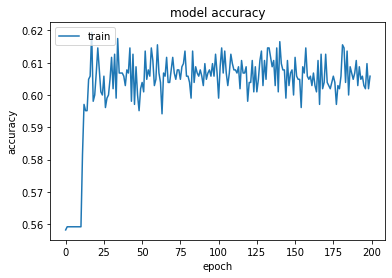

In [819]:
history = classifier.fit(X_train, y_train, epochs=200, batch_size=10)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [827]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [823]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [830]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=15)

In [831]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[95 22]
 [68 32]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       117
           1       0.59      0.32      0.42       100

    accuracy                           0.59       217
   macro avg       0.59      0.57      0.55       217
weighted avg       0.59      0.59      0.56       217



=== All AUC Scores ===
[0.53424658 0.45205479 0.50684932 0.60273973 0.61643836 0.61111111
 0.65277778 0.58333333 0.66666667 0.58333333 0.55555556 0.66666667
 0.625      0.51388889 0.54166667]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5808219178082191
